## Entrenamiento PM10

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import missingno as msn

pd.options.mode.chained_assignment = None 

from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

## vamos a usar para verificar:

#### Hacemos una función para obtenner el -promedio- de los dos modelos

In [2]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

## Hacemos una función para graficar

In [3]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

In [4]:
def ploter_title(y_test_0,X_test_0,pronosticados_0,model,titulo,ejex,ejey,color_user,ruta="./savedpic.png",dpi_user=300):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color=color_user)
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel(ejex)
    plt.ylabel(ejey)
    plt.title(titulo)
    plt.savefig(ruta, dpi=dpi_user)
    plt.show()

## Cargamos los modelos ya entrenados:

In [5]:
conta = 'PM10'

In [6]:
model = [0 for col in range(25)]
modelq = [0 for col in range(25)]

In [7]:
for i in range(0,24):
    model[i] = joblib.load(str('./modelos/'+ conta +'/'+ conta + '_'+str(i+1)+'hora.pkl'))
    print(str('./modelos/' + conta + '/' + conta + '_' + str(i+1)+'hora.pkl'))
    #modelq[i] = joblib.load(str('./modelos/'+conta+'/' + conta+ '_'+str(i+1)+'hora_quantile.pkl'))
    if i == range(0,24)[-1]:
        print('./modelos/O3/O3_'+str(i+1)+'hora.pkl')

[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_1hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_2hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_3hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_4hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_5hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_6hora.pkl
[02:35:21] WARNING: /workspace/src/objective/regression_ob

#### Cargamos los datos:

In [8]:
data_hour_merge = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos_modelos_PM10.csv")

In [9]:
data_hour_merge.head(2)

,PM10mean_1.0_max,PM10_9.0_mean,PM10_max,PM10_6.0_mean,PM10mean_4.0_mean,PM25mean_8.0_max,PM10mean_2.0_max,PM25mean_0.0_mean,PM10mean_11.0_mean,PM10mean_13.0_mean,...,PM10mean_max_frcst_14,PM10mean_max_frcst_15,PM10mean_max_frcst_16,PM10mean_max_frcst_17,PM10mean_max_frcst_18,PM10mean_max_frcst_19,PM10mean_max_frcst_20,PM10mean_max_frcst_21,PM10mean_max_frcst_22,PM10mean_max_frcst_23
0,32.958333,25.428571,29.0,25.263158,26.466667,14.208333,34.583333,11.281250,23.875000,24.104167,...,19.916667,19.416667,18.541667,18.666667,18.500000,18.125,17.708333,17.291667,17.041667,17.041667
1,34.583333,29.941176,58.0,23.625000,26.591667,12.541667,35.375000,11.733333,23.947917,24.343750,...,19.250000,19.916667,19.416667,18.541667,18.666667,18.500,18.125000,17.708333,17.291667,17.041667


Definimos la lista de los targets:

In [10]:
target = "PM10mean_max_frcst_"

In [11]:
lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))


In [12]:
data_hour_merge[["fecha",'PM10mean_0.0_max','PM10mean_1.0_max','PM10mean_2.0_max']].head(10)

,fecha,PM10mean_0.0_max,PM10mean_1.0_max,PM10mean_2.0_max
0,2019-06-28 22:00:00,24.708333,32.958333,34.583333
1,2019-06-28 21:00:00,32.958333,34.583333,35.375000
2,2019-06-28 20:00:00,34.583333,35.375000,34.666667
3,2019-06-28 19:00:00,35.375000,34.666667,34.791667
4,2019-06-28 18:00:00,34.666667,34.791667,35.000000
5,2019-06-28 17:00:00,34.791667,35.000000,34.583333
6,2019-06-28 16:00:00,35.000000,34.583333,35.000000
7,2019-06-28 15:00:00,34.583333,35.000000,25.416667
8,2019-06-28 14:00:00,35.000000,25.416667,25.291667
9,2019-06-28 13:00:00,25.416667,25.291667,25.083333


In [13]:
data_hour_merge[["fecha","PM10mean_0.0_max","PM10mean_max_frcst_1","PM10mean_max_frcst_2","PM10mean_max_frcst_3"]].head(10)

,fecha,PM10mean_0.0_max,PM10mean_max_frcst_1,PM10mean_max_frcst_2,PM10mean_max_frcst_3
0,2019-06-28 22:00:00,24.708333,24.458333,23.125000,22.625000
1,2019-06-28 21:00:00,32.958333,24.708333,24.458333,23.125000
2,2019-06-28 20:00:00,34.583333,32.958333,24.708333,24.458333
3,2019-06-28 19:00:00,35.375000,34.583333,32.958333,24.708333
4,2019-06-28 18:00:00,34.666667,35.375000,34.583333,32.958333
5,2019-06-28 17:00:00,34.791667,34.666667,35.375000,34.583333
6,2019-06-28 16:00:00,35.000000,34.791667,34.666667,35.375000
7,2019-06-28 15:00:00,34.583333,35.000000,34.791667,34.666667
8,2019-06-28 14:00:00,35.000000,34.583333,35.000000,34.791667
9,2019-06-28 13:00:00,25.416667,35.000000,34.583333,35.000000


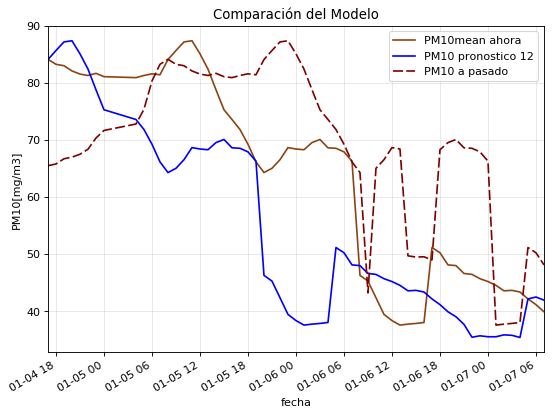

In [14]:
data_hour_merge['fecha'] =  pd.to_datetime(data_hour_merge['fecha'], format='%Y-%m-%d %H:%M')


fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

data_hour_merge.tail(60).plot(x="fecha", y=["PM10mean_0.0_max"],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
data_hour_merge.tail(60).plot(x="fecha", y=["PM10mean_max_frcst_12"],ax=ax,label=["PM10 pronostico 12"],color="blue")
data_hour_merge.tail(60).plot(x="fecha", y=["PM10mean_12.0_max"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

In [15]:
data_hour_merge.drop("fecha",axis=1,inplace=True)

# Empezamos con el entrenamiento:

#### HORA 1 

#### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [16]:
hora = 1

In [17]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [18]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [19]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

Definimos los conjuntos de prueba:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [21]:
X_train.columns.tolist()

['PM10mean_1.0_max',
 'PM10_9.0_mean',
 'PM10_max',
 'PM10_6.0_mean',
 'PM10mean_4.0_mean',
 'PM25mean_8.0_max',
 'PM10mean_2.0_max',
 'PM25mean_0.0_mean',
 'PM10mean_11.0_mean',
 'PM10mean_13.0_mean',
 'PM10_2.0_mean',
 'PM10_13.0_mean',
 'PM10_3.0_mean',
 'PM10mean_28.0_max',
 'PM25mean_1.0_max',
 'PM10mean_26.0_mean',
 'PM10mean_10.0_mean',
 'PM10mean_7.0_mean',
 'PM10mean_16.0_mean',
 'PM10mean_20.0_mean',
 'PM10mean_4.0_max',
 'PM10mean_29.0_max',
 'PM10mean_5.0_max',
 'PM25mean_2.0_max',
 'PM25mean_5.0_mean',
 'PM10mean_9.0_max',
 'PM25mean_4.0_max',
 'PM10mean_19.0_max',
 'PM25mean_4.0_mean',
 'PM10mean_10.0_max',
 'PM2.5_mean',
 'PM25mean_max',
 'PM10_7.0_max',
 'PM10_7.0_mean',
 'PM25mean_12.0_max',
 'PM10mean_24.0_max',
 'PM10_8.0_max',
 'PM10mean_25.0_mean',
 'PM10_3.0_max',
 'PM10mean_14.0_max',
 'PM10mean_30.0_mean',
 'PM25mean_13.0_max',
 'PM10_0.0_mean',
 'PM10mean_24.0_mean',
 'PM10mean_max',
 'PM10mean_25.0_max',
 'PM10_6.0_max',
 'PM10mean_23.0_max',
 'PM25mean_3.0_ma

## Modelo

In [22]:
from xgboost.sklearn import XGBRegressor

In [23]:
model[0] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=128,random_state=123)

In [24]:
model[0].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=128, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [25]:
#Predict 
pronos_1 = model[0].predict(X_test)

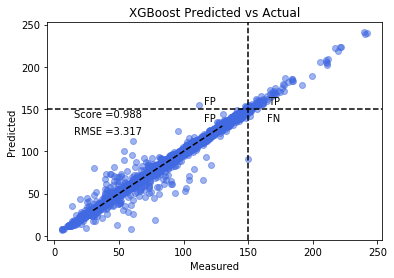

In [26]:
ploter(y_test,X_test,pronos_1,model[0])

In [27]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM10/PM10_1hora.pkl']

## Gradienst Descent:

# HORA 2

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [28]:
hora = 2

In [29]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [30]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [31]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [33]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [34]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [35]:
pronos_2_q = model[hora-1].predict(X_test)

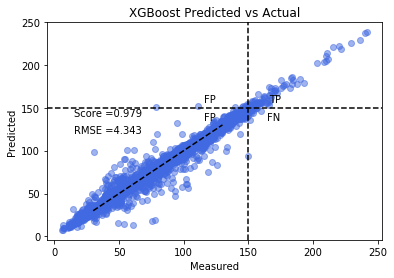

In [36]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

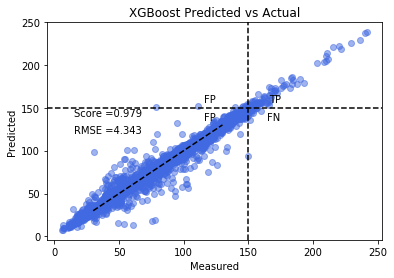

In [37]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [38]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM10/PM10_2hora.pkl']

# HORA 3

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [39]:
hora = 3

In [40]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [41]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [42]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [44]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [45]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [46]:
pronos_2_q = model[hora-1].predict(X_test)

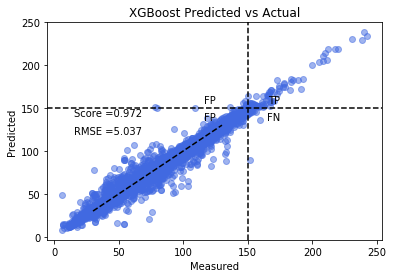

In [47]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [48]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+ conta +'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_3hora.pkl']

# HORA 4

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [49]:
hora = 4

In [50]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [51]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [52]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [54]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [55]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [56]:
pronos_2_q = model[hora-1].predict(X_test)

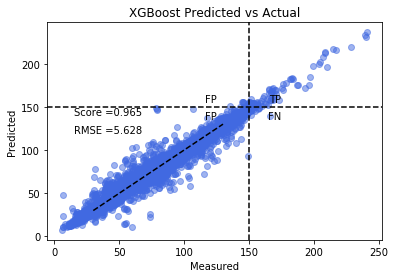

In [57]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [58]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_4hora.pkl']

# HORA 5

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [59]:
hora = 5

In [60]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [61]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [62]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [64]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [65]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [66]:
pronos_2_q = model[hora-1].predict(X_test)

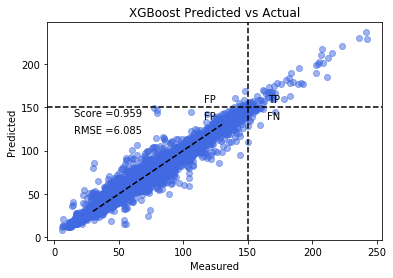

In [67]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [68]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_5hora.pkl']

# HORA 6

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [69]:
hora = 6

In [70]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [71]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [72]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [74]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [75]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [76]:
pronos_2_q = model[hora-1].predict(X_test)

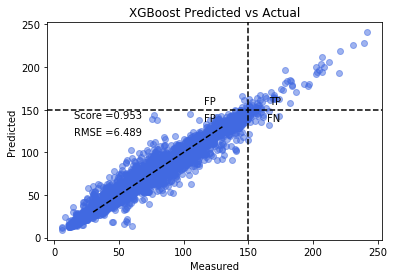

In [77]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [78]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_6hora.pkl']

# HORA 7

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [79]:
hora = 7

In [80]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [81]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [82]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [84]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [85]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [86]:
pronos_2_q = model[hora-1].predict(X_test)

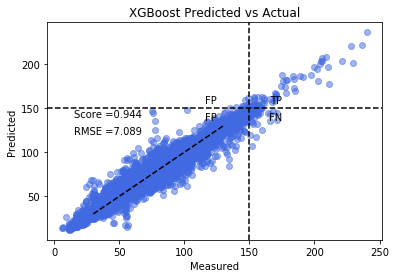

In [87]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [88]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_7hora.pkl']

# HORA 8

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [89]:
hora = 8

In [90]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [91]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [92]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [94]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [95]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [96]:
pronos_2_q = model[hora-1].predict(X_test)

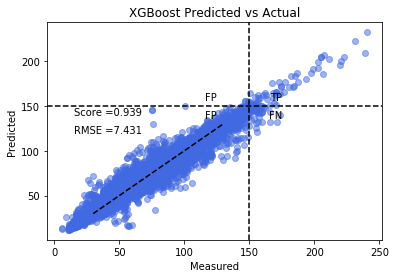

In [97]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [98]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_8hora.pkl']

# HORA 9

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [99]:
hora = 9

In [100]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [101]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [102]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [104]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [105]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:02:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [106]:
pronos_2_q = model[hora-1].predict(X_test)

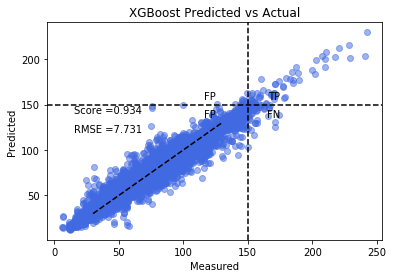

In [107]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [108]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_9hora.pkl']

# HORA 10

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [109]:
hora = 10

In [110]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [111]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [112]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [114]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [115]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [116]:
pronos_2_q = model[hora-1].predict(X_test)

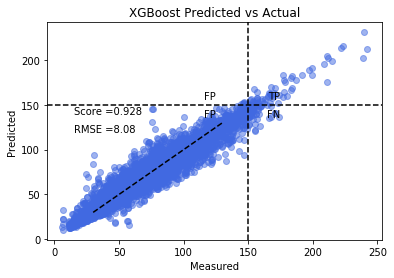

In [117]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [118]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_10hora.pkl']

# HORA 11

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [119]:
hora = 11

In [120]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [121]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [122]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [124]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [125]:
1*1

1

In [126]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:11:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [127]:
pronos_2_q = model[hora-1].predict(X_test)

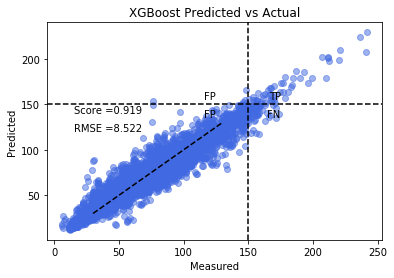

In [128]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [129]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_11hora.pkl']

# HORA 12

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [130]:
hora = 12

In [131]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [132]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [133]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [135]:
X_train.columns.tolist()

['PM10mean_1.0_max',
 'PM10_9.0_mean',
 'PM10_max',
 'PM10_6.0_mean',
 'PM10mean_4.0_mean',
 'PM25mean_8.0_max',
 'PM10mean_2.0_max',
 'PM25mean_0.0_mean',
 'PM10mean_11.0_mean',
 'PM10mean_13.0_mean',
 'PM10_2.0_mean',
 'PM10_13.0_mean',
 'PM10_3.0_mean',
 'PM10mean_28.0_max',
 'PM25mean_1.0_max',
 'PM10mean_26.0_mean',
 'PM10mean_10.0_mean',
 'PM10mean_7.0_mean',
 'PM10mean_16.0_mean',
 'PM10mean_20.0_mean',
 'PM10mean_4.0_max',
 'PM10mean_29.0_max',
 'PM10mean_5.0_max',
 'PM25mean_2.0_max',
 'PM25mean_5.0_mean',
 'PM10mean_9.0_max',
 'PM25mean_4.0_max',
 'PM10mean_19.0_max',
 'PM25mean_4.0_mean',
 'PM10mean_10.0_max',
 'PM2.5_mean',
 'PM25mean_max',
 'PM10_7.0_max',
 'PM10_7.0_mean',
 'PM25mean_12.0_max',
 'PM10mean_24.0_max',
 'PM10_8.0_max',
 'PM10mean_25.0_mean',
 'PM10_3.0_max',
 'PM10mean_14.0_max',
 'PM10mean_30.0_mean',
 'PM25mean_13.0_max',
 'PM10_0.0_mean',
 'PM10mean_24.0_mean',
 'PM10mean_max',
 'PM10mean_25.0_max',
 'PM10_6.0_max',
 'PM10mean_23.0_max',
 'PM25mean_3.0_ma

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [136]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    
    plt.xlabel('Real')
    plt.ylabel('Pronosticado')
    plt.title('Pronóstico con Persistencia Temporal')
    plt.show()

In [137]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [138]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [139]:
pronos_2_q = model[hora-1].predict(X_test)

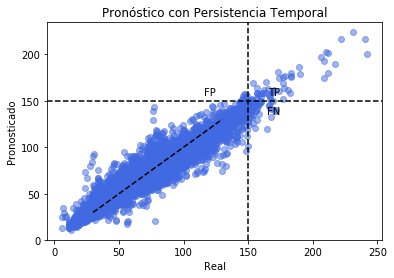

In [140]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [141]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_12hora.pkl']

# HORA 13

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [142]:
hora = 13

In [143]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [144]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [145]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [147]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [148]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [149]:
pronos_2_q = model[hora-1].predict(X_test)

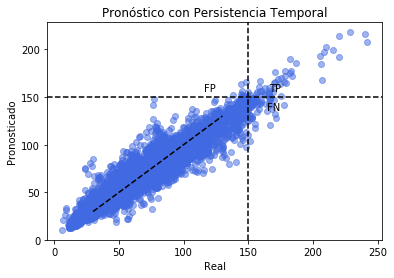

In [150]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [151]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_13hora.pkl']

# HORA 14

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [152]:
hora = 14

In [153]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [154]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [155]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [157]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [158]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [159]:
pronos_2_q = model[hora-1].predict(X_test)

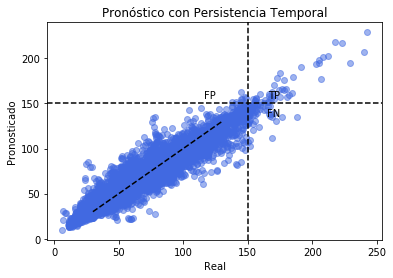

In [160]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [161]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM10/PM10_14hora.pkl']

# HORA 15

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [162]:
hora = 15

In [163]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [164]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [165]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [167]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [168]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [169]:
pronos_2_q = model[hora-1].predict(X_test)

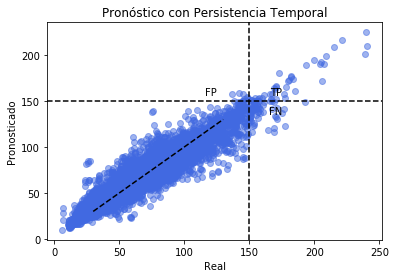

In [170]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [171]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_15hora.pkl']

# HORA 16

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [172]:
hora = 16

In [173]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [174]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [175]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [177]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [178]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [179]:
pronos_2_q = model[hora-1].predict(X_test)

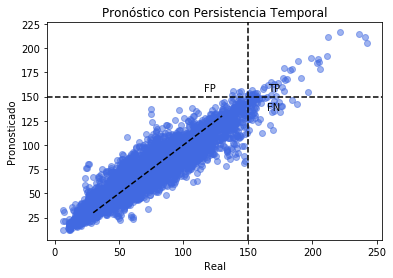

In [180]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [181]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_16hora.pkl']

# HORA 17

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [182]:
hora = 17

In [183]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [184]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [185]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [187]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [188]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [189]:
pronos_2_q = model[hora-1].predict(X_test)

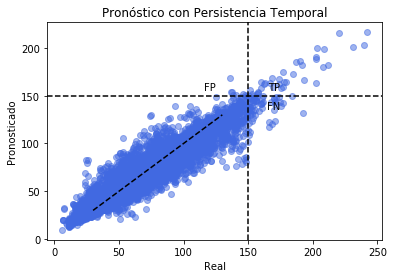

In [190]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [191]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_17hora.pkl']

# HORA 18

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [192]:
hora = 18

In [193]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [194]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [195]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [197]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [198]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [199]:
pronos_2_q = model[hora-1].predict(X_test)

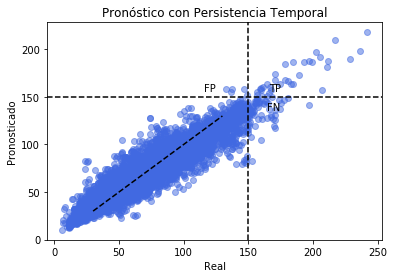

In [200]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [201]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+ conta+'_'+ str(hora) + 'hora.pkl') 

['./modelos/PM10/PM10_18hora.pkl']

# HORA 19

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [202]:
 hora = 19

In [203]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [204]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [205]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [207]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [208]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [209]:
pronos_2_q = model[hora-1].predict(X_test)

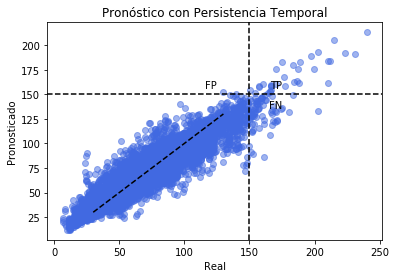

In [210]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [211]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_19hora.pkl']

In [212]:
1*1

1

# HORA 20

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [213]:
hora = 20

In [214]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [215]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [216]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [218]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [219]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [220]:
pronos_2_q = model[hora-1].predict(X_test)

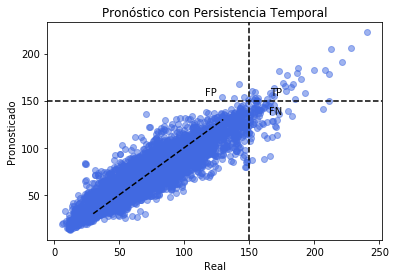

In [221]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [222]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_20hora.pkl']

# HORA 21

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [223]:
hora = 21

In [224]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [225]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [226]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [228]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [229]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [230]:
pronos_2_q = model[hora-1].predict(X_test)

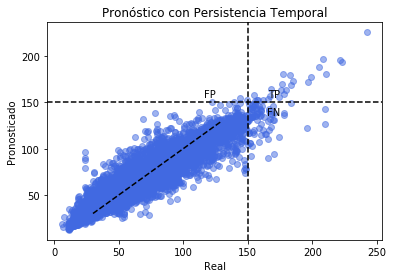

In [231]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [232]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM10/PM10_21hora.pkl']

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [233]:
hora = 22

In [234]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [235]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [236]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [238]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [239]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [240]:
pronos_2_q = model[hora-1].predict(X_test)

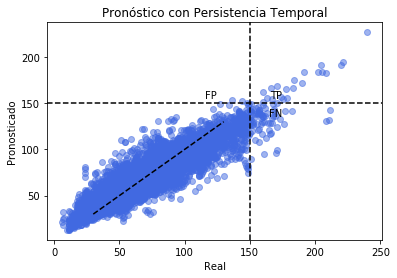

In [241]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [242]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_22hora.pkl']

# HORA 23

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [243]:
hora = 23

In [244]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [245]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [246]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [248]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [249]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:07:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [250]:
pronos_2_q = model[hora-1].predict(X_test)

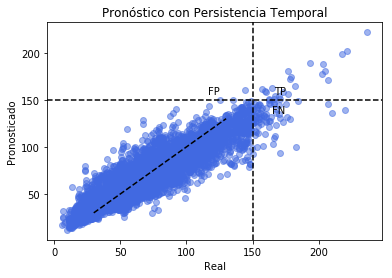

In [251]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [252]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_23hora.pkl']

# HORA 24

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [253]:
hora = 24

In [254]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [255]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [256]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [258]:
X_train.columns.tolist()

['PM10mean_1.0_max',
 'PM10_9.0_mean',
 'PM10_max',
 'PM10_6.0_mean',
 'PM10mean_4.0_mean',
 'PM25mean_8.0_max',
 'PM10mean_2.0_max',
 'PM25mean_0.0_mean',
 'PM10mean_11.0_mean',
 'PM10mean_13.0_mean',
 'PM10_2.0_mean',
 'PM10_13.0_mean',
 'PM10_3.0_mean',
 'PM10mean_28.0_max',
 'PM25mean_1.0_max',
 'PM10mean_26.0_mean',
 'PM10mean_10.0_mean',
 'PM10mean_7.0_mean',
 'PM10mean_16.0_mean',
 'PM10mean_20.0_mean',
 'PM10mean_4.0_max',
 'PM10mean_29.0_max',
 'PM10mean_5.0_max',
 'PM25mean_2.0_max',
 'PM25mean_5.0_mean',
 'PM10mean_9.0_max',
 'PM25mean_4.0_max',
 'PM10mean_19.0_max',
 'PM25mean_4.0_mean',
 'PM10mean_10.0_max',
 'PM2.5_mean',
 'PM25mean_max',
 'PM10_7.0_max',
 'PM10_7.0_mean',
 'PM25mean_12.0_max',
 'PM10mean_24.0_max',
 'PM10_8.0_max',
 'PM10mean_25.0_mean',
 'PM10_3.0_max',
 'PM10mean_14.0_max',
 'PM10mean_30.0_mean',
 'PM25mean_13.0_max',
 'PM10_0.0_mean',
 'PM10mean_24.0_mean',
 'PM10mean_max',
 'PM10mean_25.0_max',
 'PM10_6.0_max',
 'PM10mean_23.0_max',
 'PM25mean_3.0_ma

In [259]:
corr = X_train.corr()

## Modelos

### Leemos el pasado

# Quantile 95

## modelo normal

In [260]:
model[hora-1] = XGBRegressor(learning_rate=0.01,n_estimators=1500,n_jobs=100,random_state=123,max_depth=10)

In [261]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=100, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [262]:
pronos_2_q = model[hora-1].predict(X_test)

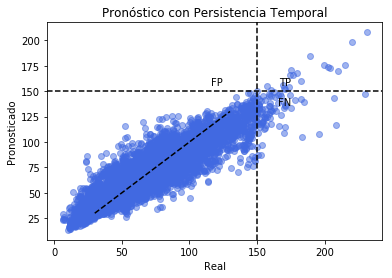

In [263]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

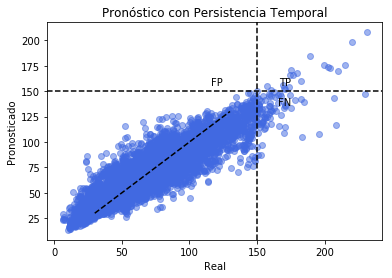

In [264]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

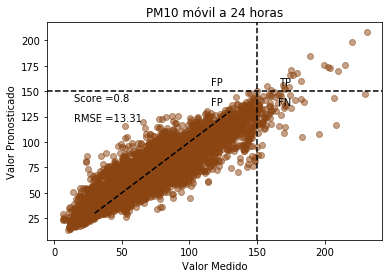

In [265]:
ploter_title(y_test,X_test,pronos_2_q,model[hora-1],"PM10 móvil a 24 horas","Valor Medido","Valor Pronosticado","saddlebrown")

In [266]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM10/PM10_24hora.pkl']

# Viz

## O3

In [267]:
conta = "O3"
model_O3_24 = joblib.load(str('./modelos/'+ conta +'/'+ conta + '_'+str(24)+'hora.pkl'))

data_hour_merge_O3 = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos_modelos_O3.csv")

data_hour_merge_O3.head(2)

target = "O3_max_frcst_"

lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))

hora = 24

dataset = data_hour_merge_O3.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

#Definimos los conjuntos de prueba:

X_train_O3, X_test_O3, y_train_O3, y_test_O3 = train_test_split(X, y, test_size=0.3, random_state=123)

#Predict 
pronos_1 = model_O3_24.predict(X_test_O3)

[04:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields fecha

In [ ]:
plt.scatter(pronos_2_q, y_test,alpha=0.4,color="saddlebrown",label = "PM10")
plt.scatter(pronos_1, y_test_O3,alpha=0.1,color="royalblue",label="O3")

#score = round(model.score(X_test_0, y_test_0),3)
#rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
plt.plot([30,130],[30,130],color="k",linestyle='--')

plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')
#plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
              #horizontalalignment='left')
#plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
              #horizontalalignment='left')


plt.xlabel('Valor Medido')
plt.ylabel('Valor Pronosticado')
plt.title('Valores Medidos vs Pronosticados')

plt.show()

In [ ]:
import random

In [ ]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=280, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])
plt.plot([90,190],[90,190],color="k",alpha=0.9)
plt.scatter(pronos_2_q, y_test,alpha=0.8,color="saddlebrown",label = "PM10")
plt.scatter(pronos_1, y_test_O3,alpha=0.7,color="royalblue",label="O3")


plt.xlabel('Valor Medido')
plt.ylabel('Valor Pronosticado')
plt.title('Valores Medidos vs Pronosticados')

plt.axhline(y=150, color='k', linestyle='--',alpha=0.6)
plt.axvline(x=150, color='k', linestyle='--',alpha=0.6)


# And a corresponding grid
#ax.grid(which='both')

# Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.01)
# ax.grid(which='major', alpha=0.3)

ax.set_xlim(80,200)
ax.set_ylim(80,200)

plt.legend()
plt.show()